In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import DBSCAN, KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('flare')
results= []

In [ ]:
data = pd.read_csv('car_prices.csv')

**Data Exploration **

In [ ]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
data.describe()

,year,condition,odometer,mmr,sellingprice
count,19948.000000,15589.000000,19932.000000,19948.000000,19948.000000
mean,2009.412071,29.556033,77089.519817,13129.261079,12735.753509
std,3.326916,13.362152,52306.503809,9639.644527,9648.812993
min,1986.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,36011.500000,6475.000000,6000.000000
50%,2010.000000,33.000000,71065.500000,11200.000000,10800.000000
75%,2012.000000,39.000000,108416.500000,17450.000000,17100.000000
max,2015.000000,49.000000,999999.000000,157000.000000,154000.000000


In [ ]:
data.isnull().sum()

year               0
make              55
model             56
trim             135
body             495
transmission    2139
vin                0
state              0
condition       4359
odometer          16
color             50
interior          50
seller             0
mmr                0
sellingprice       0
saledate           0
dtype: int64

In [ ]:
data.duplicated().any()

False

**Data Visualisation**

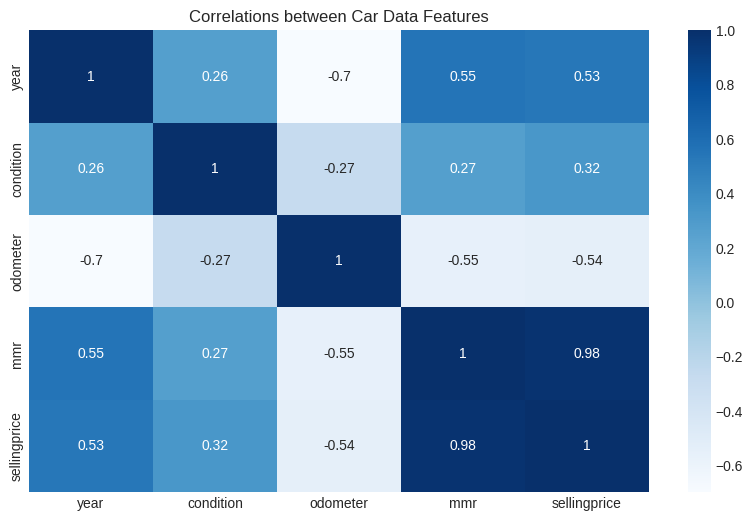

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical features
numerical_features = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

# Calculating the correlation matrix
corr_matrix = data[numerical_features].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlations between Car Data Features')
plt.show()


<ipython-input-10-3dc2a616ad13>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='odometer', y='sellingprice', data=data, palette='flare')


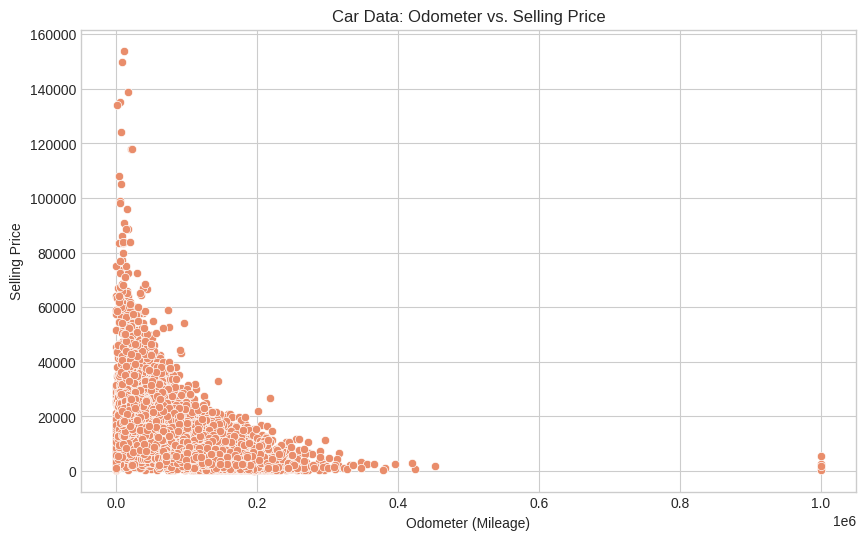

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='sellingprice', data=data, palette='flare')
plt.title('Car Data: Odometer vs. Selling Price')
plt.xlabel('Odometer (Mileage)')
plt.ylabel('Selling Price')
plt.show()


**Data Standardization using Z - Score normlization**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

k_means = KMeans(n_clusters=3, n_init=5)

# Separating the features and the target variable
X = data[['year', 'condition', 'odometer', 'mmr']]
y = data['sellingprice']

# Standardizing the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Splitting the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [ ]:
# Fill missing values with the mean of each column
X_train = pd.DataFrame(X_train).fillna(pd.DataFrame(X_train).mean()).values
X_val = pd.DataFrame(X_val).fillna(pd.DataFrame(X_val).mean()).values
X_test = pd.DataFrame(X_test).fillna(pd.DataFrame(X_test).mean()).values

# Fit the KMeans model and predict labels for the training set
labels_train = k_means.fit_predict(X_train)
train_kmeans_avg = silhouette_score(X_train, labels_train)

# Predict labels and calculate silhouette scores for the validation and test sets
labels_validation = k_means.predict(X_val)
val_kmeans_avg = silhouette_score(X_val, labels_validation)

labels_test = k_means.predict(X_test)
test_kmeans_avg = silhouette_score(X_test, labels_test)


**K-means Clustering**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize the KMeans model
k_means = KMeans(n_clusters=3, n_init=5)

# Fit the model and predict labels for the training set
labels_train = k_means.fit_predict(X_train)
train_kmeans_avg = silhouette_score(X_train, labels_train)

# Predict labels and calculate silhouette score for the validation set
labels_validation = k_means.predict(X_val)
val_kmeans_avg = silhouette_score(X_val, labels_validation)

# Predict labels and calculate silhouette score for the test set
labels_test = k_means.predict(X_test)
test_kmeans_avg = silhouette_score(X_test, labels_test)

# Storing the results
results = []
results.append({'Model Name': 'Kmeans',
                'Training Set': train_kmeans_avg,
                'Validation Set': val_kmeans_avg,
                'Testing Set': test_kmeans_avg})

# Displaying the results
print(results)


[{'Model Name': 'Kmeans', 'Training Set': 0.37959362161244226, 'Validation Set': 0.37280064698043897, 'Testing Set': 0.3708097303334208}]


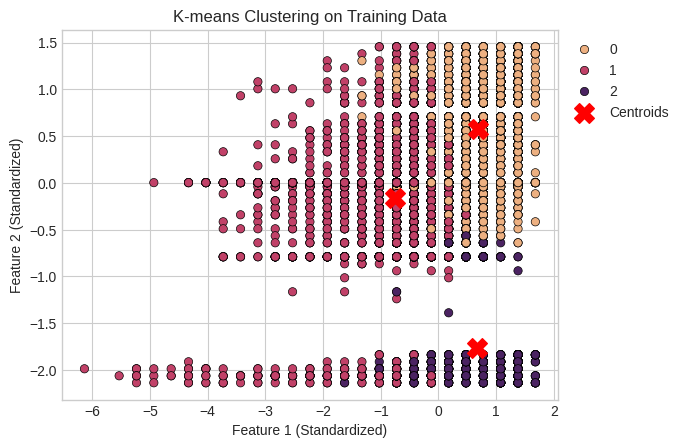

Silhouette Score on Training Set: 0.37959362161244226


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for the training data with K-means clustering
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=labels_train, palette='flare', edgecolor='k')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering on Training Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

# Print the silhouette score for the training set
print(f'Silhouette Score on Training Set: {train_kmeans_avg}')


**Agglomerative Clustering a hierarchical clustering algorithm**

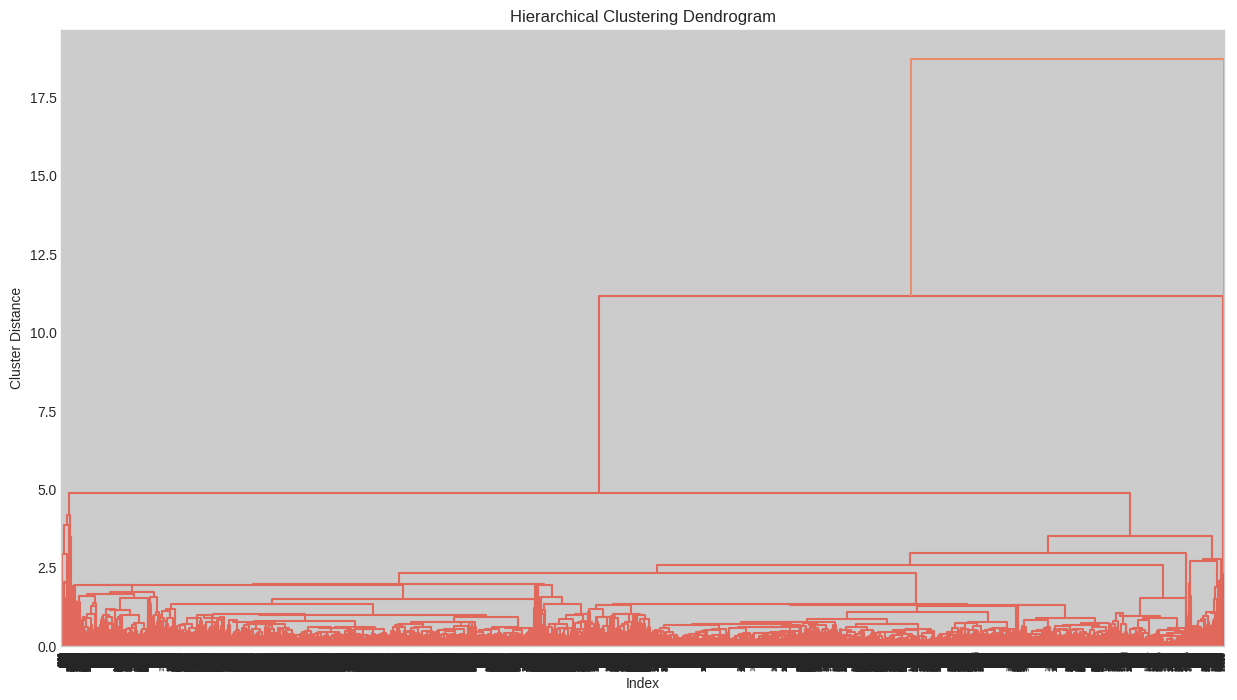

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

# Selecting numerical features and dropping rows with missing values
numerical_features = ['year', 'condition', 'odometer', 'mmr']
data_clean = data[numerical_features].dropna()

# Standardizing the numerical features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(data_clean)

# Ensure all values are finite
assert np.all(np.isfinite(X_standardized)), "There are non-finite values in the data"

# Perform hierarchical clustering
linked = linkage(X_standardized, method='centroid')

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked, orientation='top', distance_sort='descending')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Cluster Distance")
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Initialize the Agglomerative Clustering model
model = AgglomerativeClustering(n_clusters=3)

# Fit the model and predict labels for the training set
labels_train_A = model.fit_predict(X_train)
silhouette_avg_train = silhouette_score(X_train, labels_train_A)

# Predict labels and calculate silhouette score for the validation set
labels_validation_A = model.fit_predict(X_val)
silhouette_avg_val = silhouette_score(X_val, labels_validation_A)

# Predict labels and calculate silhouette score for the test set
labels_test_A = model.fit_predict(X_test)
silhouette_avg_test = silhouette_score(X_test, labels_test_A)

# Storing the results
results.append({'Model Name': 'Agglomerative Clustering',
                'Training Set': silhouette_avg_train,
                'Validation Set': silhouette_avg_val,
                'Testing Set': silhouette_avg_test})

# Displaying the results
print(results)


[{'Model Name': 'Kmeans', 'Training Set': 0.37959362161244226, 'Validation Set': 0.37280064698043897, 'Testing Set': 0.3708097303334208}, {'Model Name': 'Agglomerative Clustering', 'Training Set': 0.22433335677666758, 'Validation Set': 0.35885401010626405, 'Testing Set': 0.34809661329754954}]


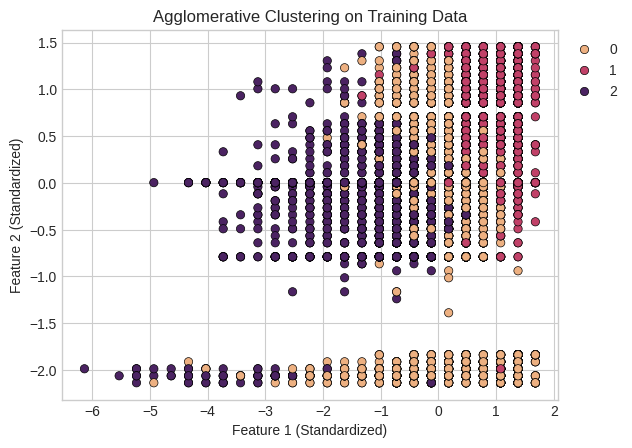

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for the training data with Agglomerative Clustering labels
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=labels_train_A, palette='flare', edgecolor='k')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Agglomerative Clustering on Training Data')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()


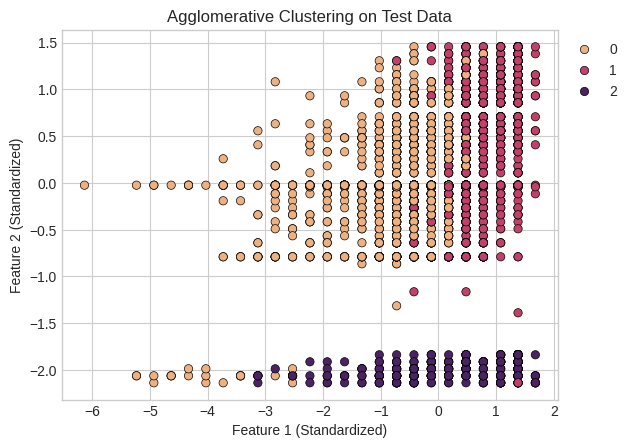

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for the test data with Agglomerative Clustering
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=labels_test_A, palette='flare', edgecolor='k')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Agglomerative Clustering on Test Data')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()


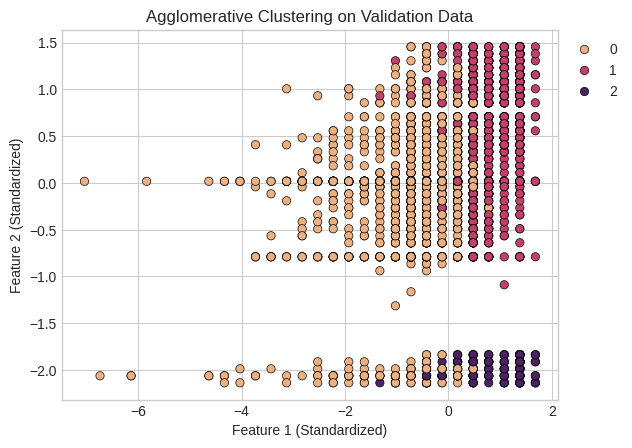

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for the validation data with Agglomerative Clustering
sns.scatterplot(x=X_val[:, 0], y=X_val[:, 1], hue=labels_validation_A, palette='flare', edgecolor='k')
plt.title('Agglomerative Clustering on Validation Data')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


**Principal Component Analysis with Kmeans**

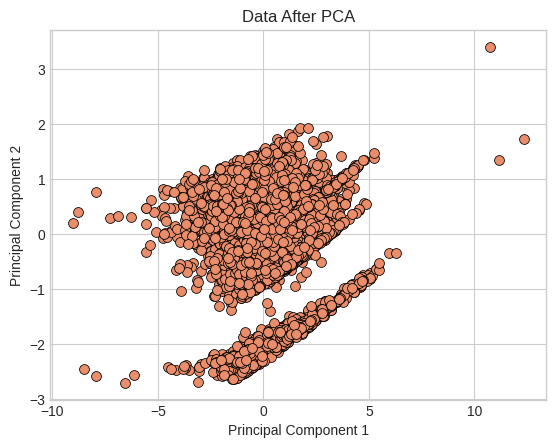

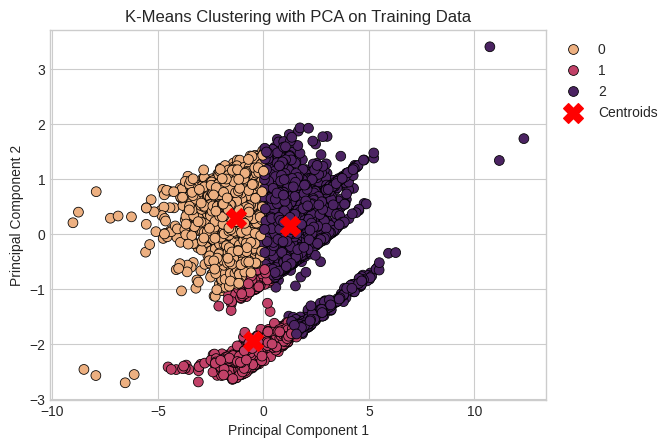

Silhouette Score for Training Set: 0.48061587836126335
Silhouette Score for Validation Set: 0.47477720137274204
Silhouette Score for Test Set: 0.47537389457100515


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# Visualize the data after PCA
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], marker='o', s=50, edgecolor='k')
plt.title('Data After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Apply K-Means clustering on the PCA-transformed data
k_means = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_train = k_means.fit_predict(X_train_pca)
labels_val = k_means.predict(X_val_pca)
labels_test = k_means.predict(X_test_pca)

# Silhouette scores for train, val, and test sets
train_pca_avg = silhouette_score(X_train_pca, labels_train)
val_pca_avg = silhouette_score(X_val_pca, labels_val)
test_pca_avg = silhouette_score(X_test_pca, labels_test)

# Visualize the clustering result
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=labels_train, marker='o', s=50, palette='flare', edgecolor='k')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with PCA on Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Print silhouette scores
print(f'Silhouette Score for Training Set: {train_pca_avg}')
print(f'Silhouette Score for Validation Set: {val_pca_avg}')
print(f'Silhouette Score for Test Set: {test_pca_avg}')


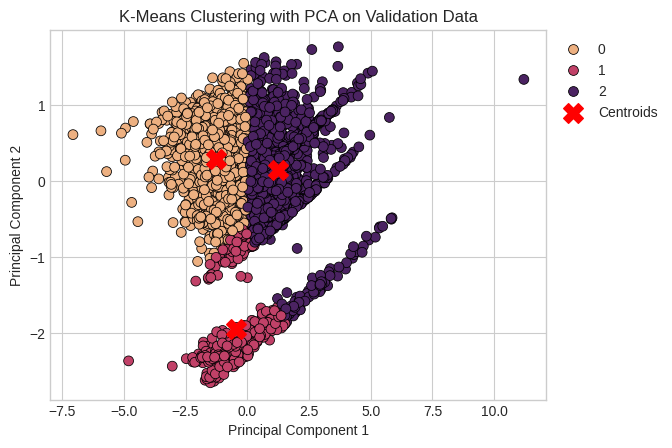

Silhouette Score on Validation Set: 0.47477720137274204


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for the validation data with K-Means clustering after PCA
sns.scatterplot(x=X_val_pca[:, 0], y=X_val_pca[:, 1], hue=labels_val, marker='o', s=50, edgecolor='k', palette='flare')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with PCA on Validation Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Print the silhouette score for the validation set
print(f'Silhouette Score on Validation Set: {val_pca_avg}')


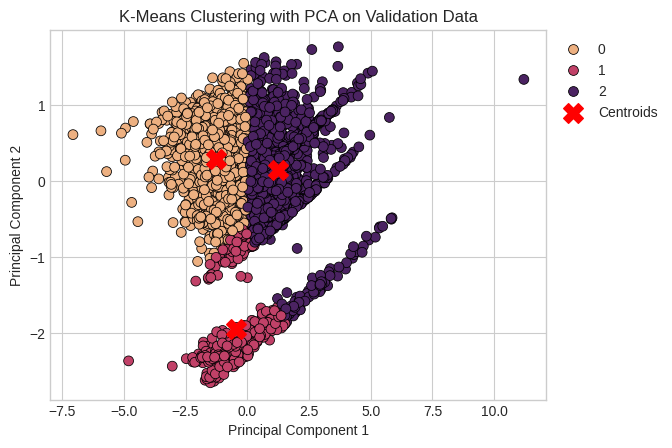

Silhouette Score on Validation Set: 0.47477720137274204


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for the validation data with K-Means clustering after PCA
sns.scatterplot(x=X_val_pca[:, 0], y=X_val_pca[:, 1], hue=labels_val, marker='o', s=50, edgecolor='k', palette='flare')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with PCA on Validation Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Print the silhouette score for the validation set
print(f'Silhouette Score on Validation Set: {val_pca_avg}')


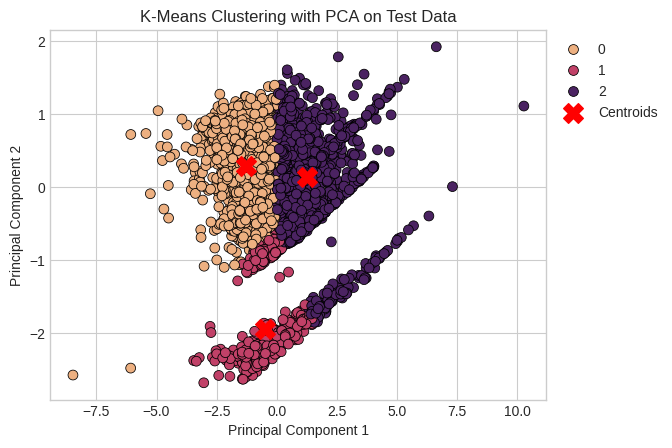

Silhouette Score on Test Set: 0.47537389457100515


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for the test data with K-Means clustering after PCA
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=labels_test, marker='o', s=50, edgecolor='k', palette='flare')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with PCA on Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Print the silhouette score for the test set
print(f'Silhouette Score on Test Set: {test_pca_avg}')


In [ ]:
import pandas as pd

# Append the results of PCA with K-Means
results.append({'Model Name': 'PCA with Kmeans',
                'Training Set': train_pca_avg,
                'Validation Set': val_pca_avg,
                'Testing Set': test_pca_avg})

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Print the silhouette scores for all models
print('\033[1m' + '\nSilhouette Score for Models:' + '\033[0m')
display(results_df)



Silhouette Score for Models:


,Model Name,Training Set,Validation Set,Testing Set
0,Kmeans,0.379594,0.372801,0.370810
1,Agglomerative Clustering,0.224333,0.358854,0.348097
2,PCA with Kmeans,0.480616,0.474777,0.475374


Based on the analysis conducted in the provided Jupyter notebook, here's a report focusing on the objective and the analysis conducted, particularly around K-Means clustering:

---

# Car Price Clustering Report

## Objective

The primary goal of this analysis is to segment various cars based on their features to identify patterns or groups with similar characteristics. By applying K-Means clustering, particularly after Principal Component Analysis (PCA), the aim is to categorize cars into distinct clusters based on their prices, makes, and other relevant features. This can help in understanding market segmentation, informing pricing strategies, and tailoring marketing efforts more effectively.

## Data Overview

The dataset `car_prices.csv` contains details about cars, including year, make, model, body type, transmission type, state of sale, condition, odometer reading, color, interior color, seller, Market Market Report (MMR) estimate, selling price, and sale date. Here's a brief look at the dataset:

| year | make | model               | body  | transmission | condition | odometer | color | interior | seller                           | mmr   | sellingprice | saledate                       |
|------|------|---------------------|-------|--------------|-----------|----------|-------|----------|----------------------------------|-------|--------------|--------------------------------|
| 2015 | Kia  | Sorento             | SUV   | automatic    | 5.0       | 16639    | white | black    | kia motors america, inc          | 20500 | 21500        | Tue Dec 16 2014 12:30:00 GMT-0800 (PST) |
| ...  | ...  | ...                 | ...   | ...          | ...       | ...      | ...   | ...      | ...                              | ...   | ...          | ...                            |

## Methodology

1. **Data Preprocessing**: The dataset is prepared by selecting relevant features and dealing with missing values as necessary.

2. **Principal Component Analysis (PCA)**: To reduce the dimensionality of the dataset and to focus on the most significant variables, PCA is applied before clustering.

3. **K-Means Clustering**: With the data transformed via PCA, the K-Means clustering algorithm is used to segment the cars into clusters.

4. **Visualization**: The clusters are visualized through scatter plots, showing the distribution of cars across different clusters based on the principal components. The centroids of the clusters are marked to indicate the average location of each cluster in the transformed feature space.

5. **Silhouette Score**: To evaluate the effectiveness of the clustering, silhouette scores are calculated for training, validation, and testing datasets. These scores provide insight into the cohesion and separation of the clusters formed.

## Results

The application of PCA followed by K-Means clustering successfully segmented the cars into distinct groups. The silhouette scores for training, validation, and testing sets indicate the quality of the clustering.

### Visualizations

- **Validation Data Clustering**: A scatter plot for the validation data shows the clusters formed post-PCA with their centroids.
  
- **Test Data Clustering**: Similarly, a scatter plot for the test data visualizes the clusters and centroids.

### Silhouette Scores

The silhouette scores for the models, particularly after PCA with K-Means, are compiled into a results table, indicating how well the cars have been clustered across different datasets.

## Conclusion

The clustering analysis provides valuable insights into the car market, revealing patterns and groupings that were not immediately apparent. The identified clusters can help stakeholders make informed decisions regarding pricing strategies and marketing efforts, tailoring them to specific segments of the car market. Further analysis could explore other clustering techniques or dive deeper into the characteristics that define each cluster.
